# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [16]:
import numpy as np

sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
n = len(sales)
mean = sales.sum()/n
delta = sales - mean
squares = delta**2
my_var = squares.sum()/(n-1)
sales_std = np.sqrt(squares.sum()/(n-1))

print('My Calculations:')
print('mean =',mean)
print('variance =',my_var)
print('standard deviation =',sales_std)

lib_var = sales.var(ddof=1)
lib_std = sales.std(ddof=1)
print('\nLibrary Calculations')
print('mean =',mean)
print('variance =',lib_var)
print('standard deviation =',lib_std)


My Calculations:
mean = 3052.714285714286
variance = 214387.90476190473
standard deviation = 463.0204150595357

Library Calculations
mean = 3052.714285714286
variance = 214387.90476190473
standard deviation = 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [15]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])

cov_matrix = np.cov(sales, customers)
cov = cov_matrix[-1,0]  # top right corner
print('the covariance between sales and customers is',cov)

the covariance between sales and customers is 7604.357142857142


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [20]:
n = len(customers)
mean = customers.sum()/n
delta = customers - mean
squares = delta**2
my_var = squares.sum()/(n-1)
customer_std = np.sqrt(squares.sum()/(n-1))

corr = cov/(sales_std*customer_std)
print('my calculation for the correlation coefficient is',corr)

corr = np.corrcoef(sales, customers)[-1,0]
print('numpy says the correlation is',corr)


my calculation for the correlation coefficient is 0.9628339778148909
numpy says the correlation is 0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [34]:
import pandas as pd

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', skipfooter=1)
titanic = titanic.drop(['Unnamed: 0'], axis=1)
titanic = titanic.replace({'female':0, 'male':1})
titanic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0


In [35]:
cov = titanic.cov()
cor = titanic.corr()
print('variance/covariance:')
print(cov)
print('correlations:')
print(cor)

variance/covariance:
                     pclass  survived  ...         body  has_cabin_number
pclass             0.701969 -0.127248  ...    -2.876653         -0.249992
survived          -0.127248  0.236250  ...     0.000000          0.061406
sex                0.050011 -0.123090  ...    -0.387672         -0.027508
age               -3.954605 -0.314343  ...    81.622922          1.464257
sibsp              0.053090 -0.014088  ...    -8.708471         -0.003946
parch              0.013287  0.034776  ...     4.237190          0.013316
fare             -24.227788  6.146023  ...  -179.164684         10.976961
body              -2.876653  0.000000  ...  9544.688567          3.625689
has_cabin_number  -0.249992  0.061406  ...     3.625689          0.174708

[9 rows x 9 columns]
correlations:
                    pclass  survived  ...      body  has_cabin_number
pclass            1.000000 -0.312469  ... -0.034642         -0.713857
survived         -0.312469  1.000000  ...       NaN          0.

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


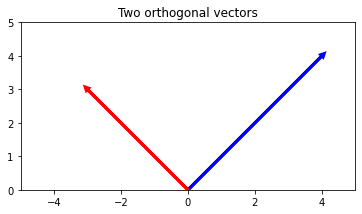

In [46]:
import matplotlib.pyplot as plt

origin = [0,0]
vec1 = [4,4]
vec2 = [-3,3]

# Graph setup
plt.axes().set_aspect('equal')
plt.axes().set(xlim=(-5,5), ylim=(0,5))

# Plot the vectors
style = {'linewidth':3, 'head_width':0.1, 'head_length':0.1}
plt.arrow(*origin, *vec1, color='blue', **style)
plt.arrow(*origin, *vec2, color='red', **style)
plt.title("Two orthogonal vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [47]:
# Two vectors are orthogonal if their dot product is zero.

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a,b)

# The two vectors are not orthogonal, as their dot product is -40.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [52]:
c = np.array([2,-15,6,20])


print('||c||^2 =',np.linalg.norm(c)**2)

print('c dot c =',np.dot(c,c))

print('c^T c =',np.matmul(c.T,c))

# All of these quantities are the same
# ||c||^2 = c dot c = c^T c

||c||^2 = 665.0
c dot c = 665
c^T c = 665


$||c||^2$ = $c \cdot c$ = $c^{T}c$

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [55]:
f = np.array([4, 12, 11, 9, 2])

norm = np.linalg.norm(f)

f_unit = f/norm
print('the unit vector is')
print(f_unit)
print('the norm of the unit vector should be 1 and is',np.linalg.norm(f_unit))

the unit vector is
[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
the norm of the unit vector should be 1 and is 0.9999999999999999


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [ ]:
import matplotlib.pyplot as plt

origin = [0,0]
g = np.array([1,2])
h = np.array([4,8])
dot = np.dot(g,h)
print(dot)

# Graph setup
plt.axes().set_aspect('equal')
plt.axes().set(xlim=(-5,5), ylim=(0,10))

# Plot the vectors
style = {'linewidth':3, 'head_width':0.1, 'head_length':0.1}
plt.arrow(*origin, *g, color='blue', **style)
plt.arrow(*origin, *h, color='red', **style)
plt.title("Two orthogonal vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [69]:
g = np.array([1,2])
h = np.array([4,8])
independence = np.var(g/h)
print(independence)

df = pd.DataFrame(data=[g,h])
df.corr()

# Two vectors are linearly dependent if the variance of one over the other is zero

# The span of g and h is c*g for any real scalar c, since both g and h are linearly dependent

0.0


,0,1
0,1.0,1.0
1,1.0,1.0


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [68]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
df = pd.DataFrame(data=[l,m,n])

df.corr()

# The span of {l,m,n} is R^3 because none of the vectors are linearly dependent on the others.

,0,1,2
0,1.000000,0.986241,-0.901127
1,0.986241,1.000000,-0.817057
2,-0.901127,-0.817057,1.000000


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


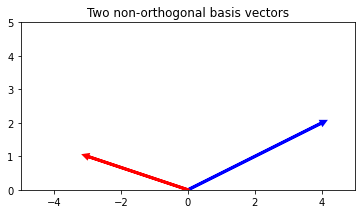

In [72]:
import matplotlib.pyplot as plt

origin = [0,0]
vec1 = [4,2]
vec2 = [-3,1]

# Graph setup
plt.gca()
plt.axes().set_aspect('equal')
plt.axes().set(xlim=(-5,5), ylim=(0,5))

# Plot the vectors
style = {'linewidth':3, 'head_width':0.1, 'head_length':0.1}
plt.arrow(*origin, *vec1, color='blue', **style)
plt.arrow(*origin, *vec2, color='red', **style)
plt.title("Two non-orthogonal basis vectors")
plt.show()

## 6.2 What does it mean to form a basis?

## A basis for $\mathbb{R}^2$ means a set of two vectors that are linearly independent, such that their span can reach all of $\mathbb{R}^2$.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [76]:
P = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

df = pd.DataFrame(P)
df.corr()

# P has a rank of 3, since no two coloumns are colinear.
# df.rank(axis=1)

,0,1,2
0,1.000000,0.986241,-0.901127
1,0.986241,1.000000,-0.817057
2,-0.901127,-0.817057,1.000000


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is how many dimensions are spanned by the matrix, which is <= the number of columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

In [86]:

# Original Vector
v = np.array([1,3])
w = np.array([-1,2])

wv = np.dot(w,v)
vv = np.dot(v,v)

proj = (wv/vv) * v


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


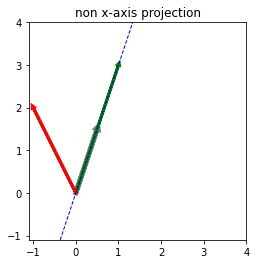

In [90]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = np.array([1,3])
w = np.array([-1,2])

wv = np.dot(w,v)
vv = np.dot(v,v)
proj = (wv/vv)*v

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=5, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

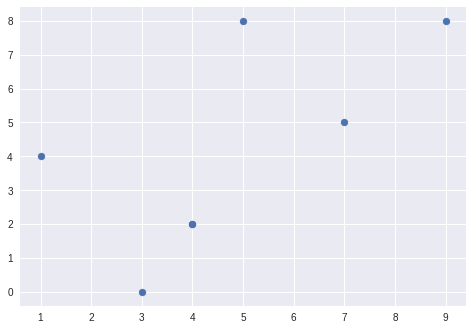

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()